# Task 1: Titanic Dataset Analysis:
--------------------------------------------------------------------------------------------------------------------------------------------------------------
## Author: Atharv Budhe
## The Intern Acedamy

In [393]:
#importing libaries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
style.use('ggplot')

import missingno as ms
import warnings
warnings.filterwarnings('ignore')


In [394]:
#inserting the datasets

train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [395]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [396]:
#droping the unecessary data

train_df.drop(['Cabin','Name','Ticket','Fare','PassengerId'],axis=1,inplace=True)
test_df.drop(['Cabin','Name','Ticket','Fare'],axis=1,inplace=True)

In [397]:
#checking the misssing data
m_val = train_df.isnull().sum().sort_values(ascending=False)
m_val.head()

Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
dtype: int64

In [398]:
#percentage of missing values

mval_per = train_df.isnull().sum()/train_df.isnull().count()*100

null_df = pd.DataFrame({'missing values' : m_val , 'percentage' : mval_per.sort_values(ascending = False)})

null_df.head()

,missing values,percentage
Age,177,19.865320
Embarked,2,0.224467
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000


In [399]:
#description OF dataset
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [400]:
#replacing the missing values with mean values

train_df["Age"]=train_df["Age"].fillna(train_df['Age'].mean())
test_df["Age"]=test_df["Age"].fillna(test_df['Age'].mean())

print("Number of missing values remained in column 'Age' of train data is ",train_df["Age"].isnull().sum(),'.')
print("Number of missing values remained in column 'Age' of test data is ",test_df["Age"].isnull().sum(),'.')

Number of missing values remained in column 'Age' of train data is  0 .
Number of missing values remained in column 'Age' of test data is  0 .


## Analysis with visualization

In [401]:
#value count of survived / not survived passsengers

pd.DataFrame({' ':['Not survived','Survived'],'Value counts' : train_df['Survived'].value_counts(),
             'Percentage(%)' : [(train_df['Survived']==0)
             .sum()*100/len(train_df),(train_df['Survived']==1)
             .sum()*100/len(train_df)]}).set_index(' ').head()

,Value counts,Percentage(%)
,,
Not survived,549,61.616162
Survived,342,38.383838


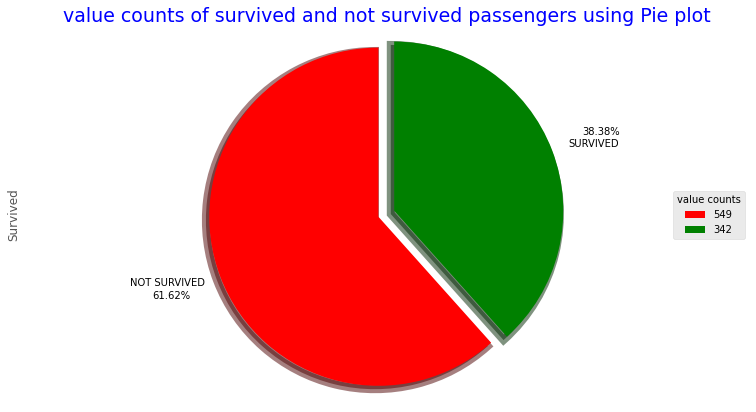

In [402]:
train_df["Survived"].value_counts().plot(kind='pie',figsize=(13,7),startangle=90,autopct='%1.2f%%',
                                         shadow=True, labels=["NOT SURVIVED","SURVIVED"],pctdistance=1.31,
                                         wedgeprops = {'linewidth': 8},
                                         colors = ["red","green"],explode=[0.1,0])
plt.title("value counts of survived and not survived passengers using Pie plot", c = "b",size=19,y=0.99) 
plt.axis("equal") 
plt.legend(title="value counts",labels=train_df["Survived"].value_counts(),loc="center right")                                       

Here we see that ,

passengers from 3rd class died more than others from 1st or 2nd classes.

In [403]:
#Cross Table
pd.crosstab(train_df["Survived"],train_df["Pclass"],margins=True,margins_name="Total")

Pclass,1,2,3,Total
Survived,,,,
0,80,97,372,549
1,136,87,119,342
Total,216,184,491,891


In [404]:
pd.crosstab(train_df["Survived"],train_df["Sex"],margins=True,margins_name="Tolal")

Sex,female,male,Tolal
Survived,,,
0,81,468,549
1,233,109,342
Tolal,314,577,891


Female passenger survive more than male passengers

In [405]:
#Data Preparation From fitting a model

from sklearn.model_selection import train_test_split  #for split dataset into train and test 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



In [406]:
#Data Preparation From fitting a model

from sklearn.model_selection import train_test_split  #for split dataset into train and test 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

lben = LabelEncoder()

train_df["Sex"] = lben.fit_transform(train_df["Sex"].values)
train_df["Embarked"] = lben.fit_transform(train_df["Embarked"].values)

#converting categorical value into integer values

test_df["Sex"]=lben.fit_transform(test_df["Sex"].values)
test_df["Embarked"]=lben.fit_transform(test_df["Embarked"].values)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [407]:
X_train = train_df.iloc[: , 1:7]
Y_train = train_df.loc[: ,'Survived']
X_test = test_df.drop("PassengerId",axis=1)

sc_object = StandardScaler()
X_train = sc_object.fit_transform(X_train)
X_test = sc_object.transform(X_test)

## search for best fitted model

In [408]:
#libaries for different machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [409]:
#Logastic Regression Model
l_regression = LogisticRegression()
l_regression.fit(X_train,Y_train)
lreg_score = round(l_regression.score(X_train,Y_train)*100,2)
print("Accuracy for Logastic Regression Model is: ",lreg_score)

#Decision Tree Model
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,Y_train)
dtree_score = round(d_tree.score(X_train,Y_train)*100,2)
print("Accuracy for Decision Tree Model is: ",dtree_score)

#Random Forest Model
r_forest = RandomForestClassifier(n_estimators=100,criterion = 'entropy',random_state = 0)
r_forest.fit(X_train,Y_train)
rf_score = round(r_forest.score(X_train,Y_train)* 100,2)
print("Accuracy for Random Forest Model is: ",rf_score)


Accuracy for Logastic Regression Model is:  80.36
Accuracy for Decision Tree Model is:  93.71
Accuracy for Random Forest Model is:  93.71


In [410]:
#Prediction with help of RANDOM FOREST MODEL

#Using test values
final_prediction = r_forest.predict(X_test)

#putting the prediction into a dataframe

output_df = pd.DataFrame({'PassengerId': test_df['PassengerId'],'Survived' :final_prediction})
output_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0
